In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


import plotly.express as px


sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)


In [2]:
# --- Load Data ---
country = "sierraleone-bumbuna"  
data_path = f"../data/{country}.csv"

df = pd.read_csv(data_path)


df.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [3]:
# --- Basic Info ---
print("Shape:", df.shape)
df.info()


display(df.describe())

missing = df.isna().sum().sort_values(ascending=False)
print("Missing values:\n", missing)
print("\nColumns with >5% missing:\n", missing[missing > 0.05 * len(df)])


Shape: (525600, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600 non-null  float64
 17  TModB    

,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
std,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN
min,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN


Missing values:
 Comments         525600
GHI                   0
Timestamp             0
DNI                   0
DHI                   0
ModB                  0
ModA                  0
RH                    0
WS                    0
WSgust                0
Tamb                  0
WSstdev               0
WD                    0
BP                    0
WDstdev               0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
dtype: int64

Columns with >5% missing:
 Comments    525600
dtype: int64


In [4]:
# Columns to check for outliers
key_cols = ["GHI", "DNI", "DHI", "ModA", "ModB", "WS", "WSgust"]

# Compute Z-scores
z_scores = np.abs(stats.zscore(df[key_cols], nan_policy='omit'))
outliers = (z_scores > 3).any(axis=1)
print(f"Number of outlier rows detected: {outliers.sum()}")


df_clean = df[~outliers].copy()


df_clean[key_cols] = df_clean[key_cols].fillna(df_clean[key_cols].median())


df_clean.to_csv(f"../data/{country}_clean.csv", index=False)
print(f"Cleaned data saved to ../data/{country}_clean.csv")


Number of outlier rows detected: 16292
Cleaned data saved to ../data/sierraleone-bumbuna_clean.csv


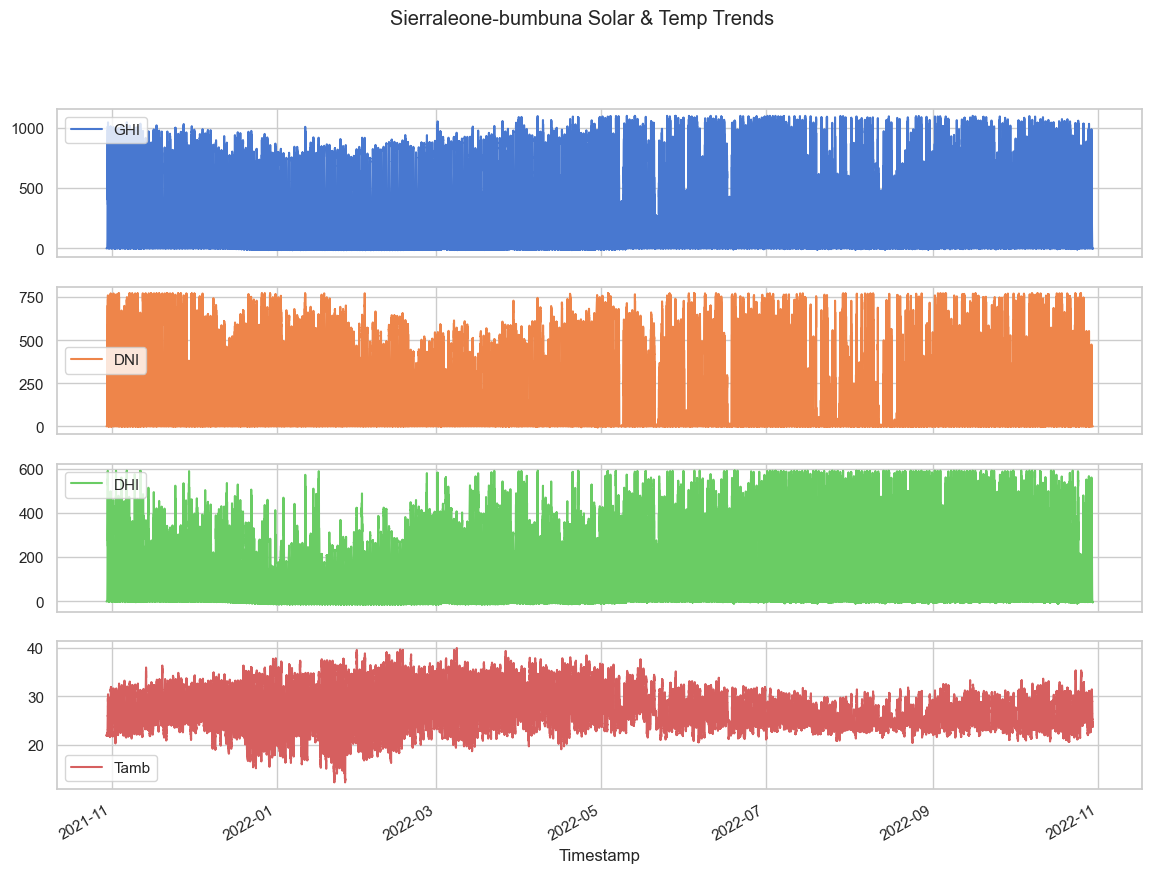

In [5]:
# Convert timestamp to datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.set_index('Timestamp', inplace=True)

# Plot time series for solar radiation and temperature
cols_to_plot = ["GHI", "DNI", "DHI", "Tamb"]
df_clean[cols_to_plot].plot(subplots=True, figsize=(14,10), title=f"{country.capitalize()} Solar & Temp Trends")
plt.show()


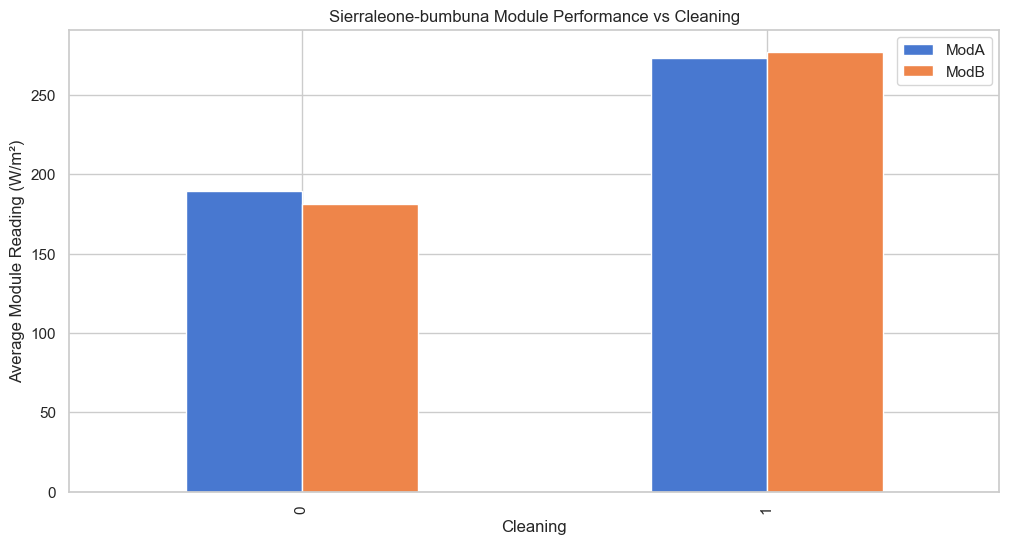

In [6]:
# Average module readings pre/post-clean
clean_avg = df_clean.groupby("Cleaning")[["ModA", "ModB"]].mean()
clean_avg.plot(kind="bar", title=f"{country.capitalize()} Module Performance vs Cleaning")
plt.ylabel("Average Module Reading (W/m²)")
plt.show()


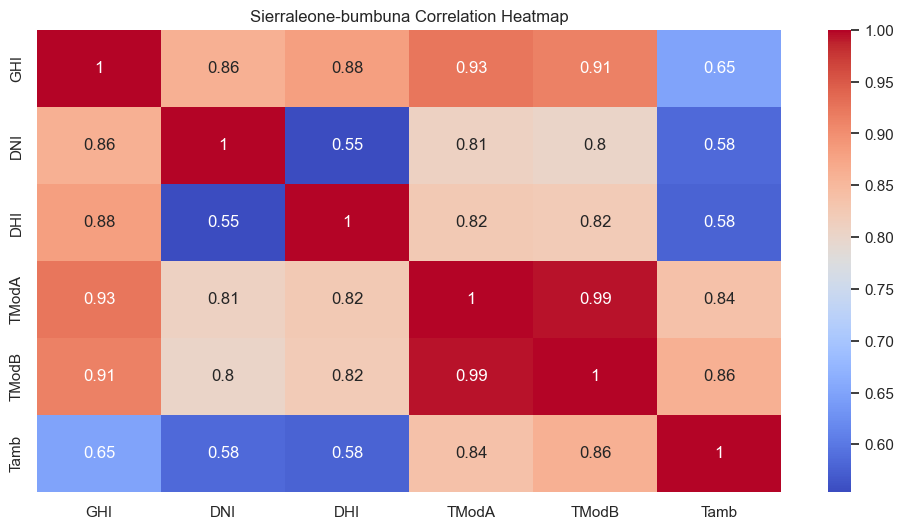

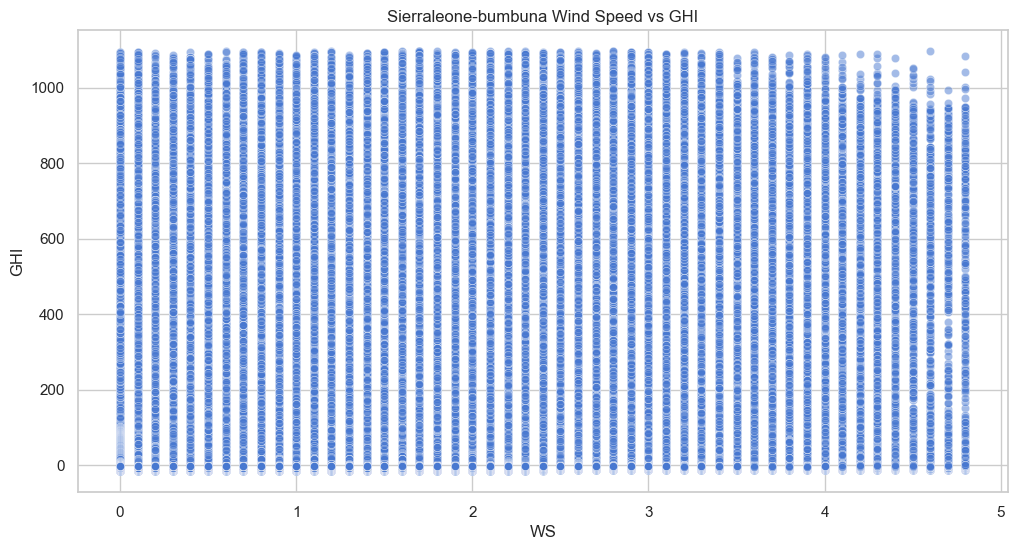

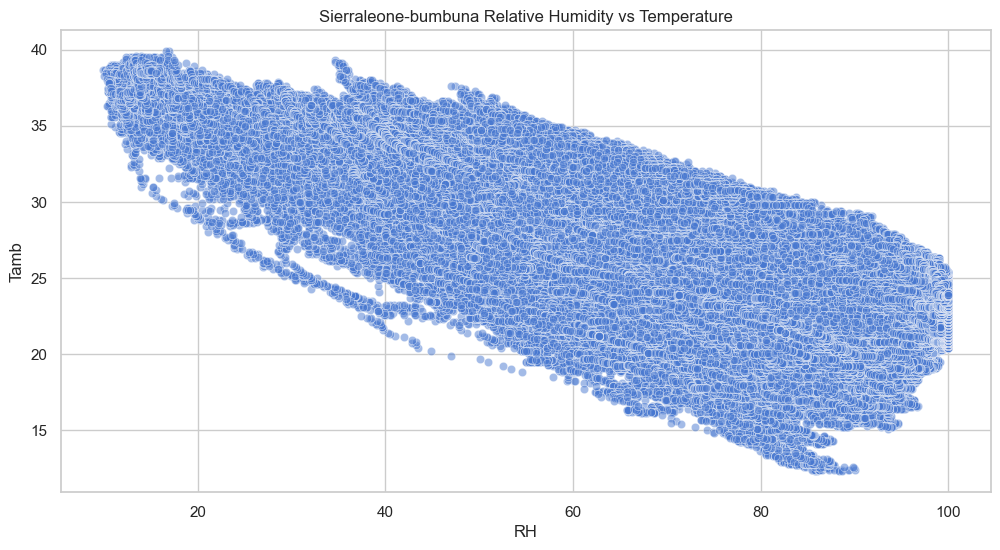

In [7]:
# Correlation heatmap
corr_cols = ["GHI", "DNI", "DHI", "TModA", "TModB", "Tamb"]
sns.heatmap(df_clean[corr_cols].corr(), annot=True, cmap="coolwarm")
plt.title(f"{country.capitalize()} Correlation Heatmap")
plt.show()

# Scatter plots examples
sns.scatterplot(data=df_clean, x="WS", y="GHI", alpha=0.5)
plt.title(f"{country.capitalize()} Wind Speed vs GHI")
plt.show()

sns.scatterplot(data=df_clean, x="RH", y="Tamb", alpha=0.5)
plt.title(f"{country.capitalize()} Relative Humidity vs Temperature")
plt.show()


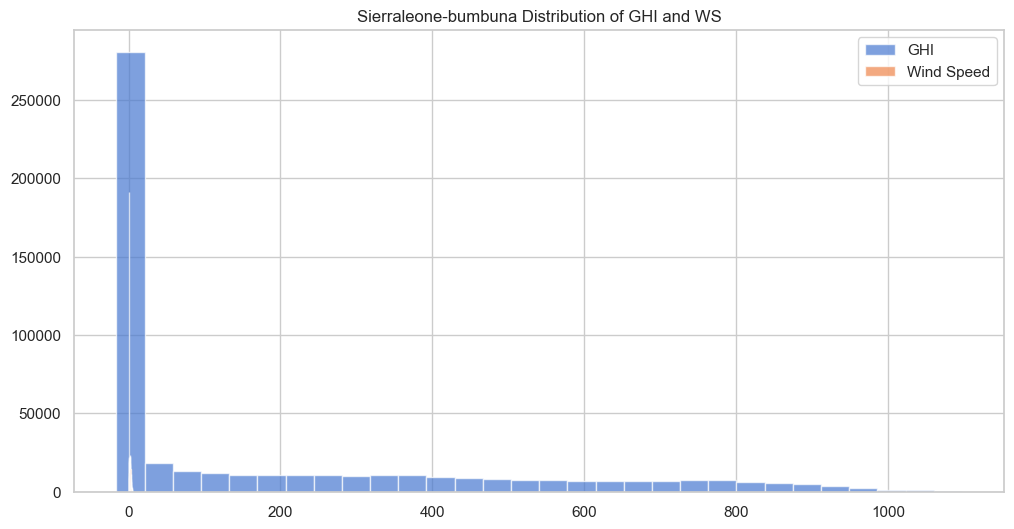

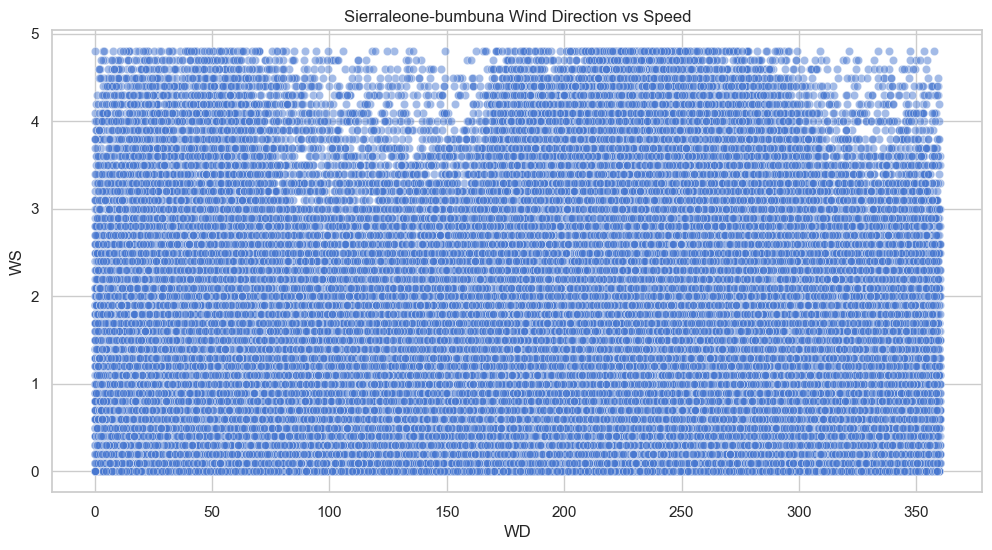

In [8]:
# Histogram of GHI
df_clean["GHI"].hist(bins=30, alpha=0.7, label="GHI")
df_clean["WS"].hist(bins=30, alpha=0.7, label="Wind Speed")
plt.legend()
plt.title(f"{country.capitalize()} Distribution of GHI and WS")
plt.show()

# Wind direction vs speed scatter
sns.scatterplot(data=df_clean, x="WD", y="WS", alpha=0.5)
plt.title(f"{country.capitalize()} Wind Direction vs Speed")
plt.show()


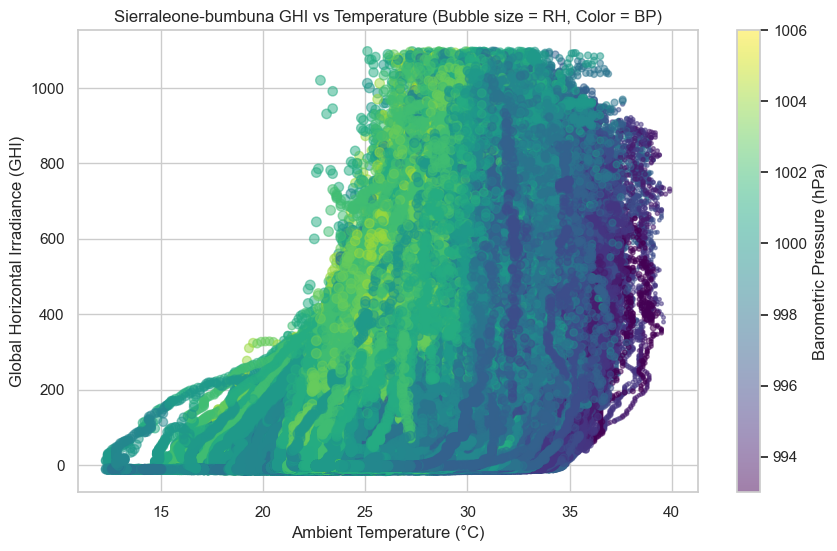

In [9]:
plt.figure(figsize=(10,6))
plt.scatter(df_clean["Tamb"], df_clean["GHI"], 
            s=df_clean["RH"]*0.5, alpha=0.5, c=df_clean["BP"], cmap="viridis")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Global Horizontal Irradiance (GHI)")
plt.title(f"{country.capitalize()} GHI vs Temperature (Bubble size = RH, Color = BP)")
plt.colorbar(label="Barometric Pressure (hPa)")
plt.show()
